In [1]:
# 數據
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

# 載入 MNIST 衣物資料
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
# 數據解釋 X 就是影像被轉換成扁平的一階張量
x_train[:3].shape #<----------學會怎樣扁平

(3, 28, 28)

In [3]:
# 提示
x_train[:3].reshape(3, 784).shape

(3, 784)

In [4]:
# 數據解釋 y
y_train[:3]

array([9, 0, 0], dtype=uint8)

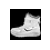

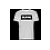

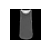

In [5]:
# 數據解釋
import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(0.4, 0.4))
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.show()


In [6]:
# 數據解釋
from keras.utils import to_categorical
X = x_train
y = y_train.reshape(-1, 1)
y = to_categorical(y).astype('int') # 因為輸出的時候分成 [0, 1] 對應機率
y_train[:3], y[:3]

(array([9, 0, 0], dtype=uint8),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers

# 读取数据

# 分割数据为特征 (X) 和标签 (y)
X = x_train.reshape(x_train.shape[0], 784) #<-----------------------------------注意現在X=28,28, X=784
y = y_train.reshape(-1, 1) #<-----------------------------------
y = to_categorical(y).astype('int') # 因為輸出的時候分成 [0..9] 對應機率
## ANN = DNN , CNN, RNN,
# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建 Sequential 模型
model = keras.Sequential()

# 添加输入层
model.add(layers.Input(shape=(X_train.shape[1],)))

# 添加隐藏层
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# 添加输出层
model.add(layers.Dense(10, activation='softmax'))  # 10分类问题，使用 softmax 激活函数

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# 训练模型
history = model.fit(X_train, y_train, epochs=10, batch_size=16, verbose = 2, validation_data=(X_test, y_test))

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'测试集上的损失：{loss}')
print(f'测试集上的准确率：{accuracy}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3000/3000 - 17s - loss: 0.4705 - accuracy: 0.8329 - val_loss: 0.3953 - val_accuracy: 0.8544 - 17s/epoch - 6ms/step
Epoch 2/10
3000/3000 - 8s - loss: 0.3502 - accuracy: 0.8727 - val_loss: 0.3749 - val_accuracy: 0.8625 - 8s/epoch - 3ms/step
Epoch 3/10
3000/3000 - 10s - los

In [8]:
print(history.history.keys())
history.history['accuracy'][:3]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[0.832937479019165, 0.8727499842643738, 0.8824166655540466]

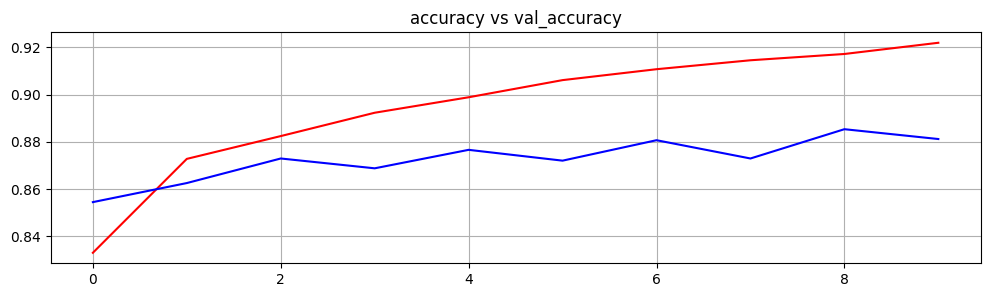

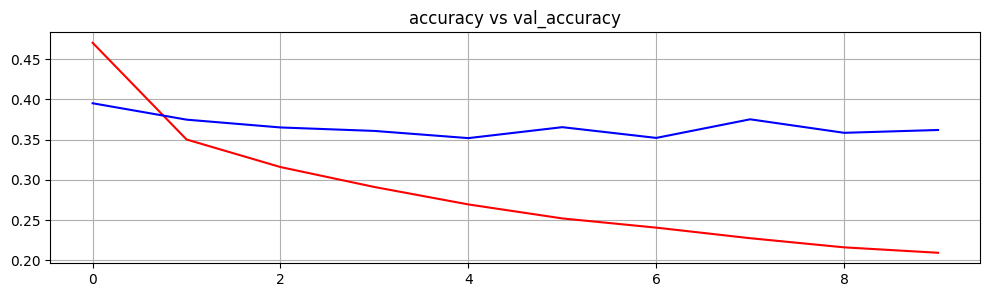

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.title('accuracy vs val_accuracy')
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.grid()
plt.title('accuracy vs val_accuracy')
plt.show()